<a href="https://colab.research.google.com/github/fkivuti/TESLA-Stock-Prices/blob/main/Stockpy_Data_Science_Recurrent_Neural_Networks_with_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [1]:
# Importing standard libraries
import pandas as pd               # library for data manipulation
import numpy as np                # library for scientific computations
import matplotlib.pyplot as plt   # library for data visualisation 

In [2]:
# Importing our dataset
# ---
train_df = pd.read_csv('https://bit.ly/38dSbSb')
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [3]:
# Sample dataset
# ---
train_df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
719,2014-11-11,48.509998,50.363998,48.400002,50.216000,50.216000,39744000
787,2015-02-20,42.155998,43.520000,41.962002,43.422001,43.422001,29910500
905,2015-08-10,47.630001,48.594002,47.209999,48.228001,48.228001,20929500
1207,2016-10-19,39.948002,41.332001,39.612000,40.712002,40.712002,34956000
345,2013-05-20,18.224001,18.500000,17.726000,17.988001,17.988001,41742000
597,2014-05-20,39.388000,39.866001,38.613998,39.060001,39.060001,27730500
520,2014-01-29,35.060001,35.818001,34.625999,35.046001,35.046001,29677500
750,2014-12-26,44.301998,45.700001,44.299999,45.563999,45.563999,16635000
169,2012-09-04,5.704000,5.798000,5.580000,5.628000,5.628000,3762500
1226,2016-11-15,36.556000,37.285999,36.410000,36.754002,36.754002,19510000


In [4]:
# Statistical summary
# ---
train_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [5]:
# Getting our train dataset
# We will use the 'Open' price for prediction.
train_set = train_df.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [6]:
train_set.shape

(1258, 1)

In [7]:
# Performing Feature scaling because the values are not in the same range
# ---
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [8]:
# Creating a dataset with 60 timesteps and 1 output
# ---
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    # print(a)
    y_train.append(train_set_scaled[i, 0])
    # print(b)
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
train_set_scaled[0:60, 0]

array([8.88718636e-03, 6.09078721e-03, 4.36697951e-03, 2.22179659e-03,
       1.45565984e-03, 3.14116070e-03, 3.83068378e-03, 7.12507183e-03,
       6.81861712e-03, 0.00000000e+00, 2.68147864e-04, 2.18348975e-03,
       1.07259146e-03, 7.27829918e-04, 3.83068378e-05, 2.48994446e-03,
       5.55449148e-03, 7.20168550e-03, 1.09940624e-02, 1.25646428e-02,
       9.38517525e-03, 1.18751197e-02, 1.45182915e-02, 1.71614633e-02,
       1.98429420e-02, 1.90768052e-02, 2.06090787e-02, 2.16050565e-02,
       1.88852710e-02, 1.96131009e-02, 2.48228309e-02, 2.63551044e-02,
       2.82321394e-02, 3.16031412e-02, 3.01857882e-02, 2.82321394e-02,
       2.91515035e-02, 2.60103428e-02, 2.68914001e-02, 2.75426164e-02,
       2.63934112e-02, 2.98027198e-02, 2.96111856e-02, 2.53974334e-02,
       2.48994446e-02, 2.48611377e-02, 2.52058993e-02, 3.09136181e-02,
       3.78854626e-02, 3.59318138e-02, 3.31737215e-02, 3.17180617e-02,
       3.30971078e-02, 3.20245164e-02, 3.18712890e-02, 3.19862095e-02,
      

In [10]:
# Reshaping 
# ---
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [11]:
# Building the RNN
# Importing the Keras libraries and packages
# ---
#
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [34]:
# Initialising the RNN
# ---
regressor = Sequential()

# Adding 4 LSTM layers and some Dropout regularisation, 30 Neurons per layer

regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 30, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer
# 'output dimension' is 1 since we are predicting 1 price each time.

regressor.add(Dense(units = 1))

In [35]:
# Compile the RNN 
# ---
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
# Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 56ms/step - loss: 0.0637
Epoch 2/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0118
Epoch 3/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0097
Epoch 4/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0092
Epoch 5/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0084
Epoch 6/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0092
Epoch 7/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0099
Epoch 8/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0077
Epoch 9/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0075
Epoch 10/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0087
Epoch 11/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0075
Epoch 12/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0066
Epoch 13/100
38/38 [=====

In [66]:
# # Making predictions: Getting the predicted stock price for 2017
test_df = pd.read_csv('https://bit.ly/3kW8E0K')
# test_df = pd.read_csv('TSLA.csv')
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
3,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000
4,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500


In [67]:
# We are using Price as the feature

real_stock_price = test_df.iloc[:, 1:2].values
print(real_stock_price)

[[ 88.094002]
 [ 92.279999]
 [ 94.739998]
 [ 99.419998]
 [ 96.358002]
 [ 98.699997]
 [108.851997]
 [105.952003]
 [ 98.75    ]
 [101.522003]
 [106.050003]
 [114.377998]
 [112.849998]
 [114.125999]
 [108.398003]
 [113.697998]
 [115.138   ]
 [126.484001]
 [128.      ]
 [134.738007]
 [176.591995]
 [164.651993]
 [139.983994]
 [146.110001]
 [160.      ]
 [153.757996]
 [155.574005]
 [148.367996]
 [157.444   ]
 [168.320007]
 [184.699997]
 [182.389999]
 [181.395996]
 [167.800003]
 [169.800003]
 [156.5     ]
 [146.      ]
 [125.940002]
 [142.251999]
 [161.      ]
 [152.792007]
 [144.753998]
 [138.      ]
 [121.078003]
 [131.886002]
 [128.039993]
 [116.178001]
 [119.      ]
 [ 93.900002]
 [ 88.001999]
 [ 77.800003]
 [ 74.940002]
 [ 87.639999]
 [ 86.720001]
 [ 95.459999]
 [109.050003]
 [109.477997]
 [101.      ]
 [102.052002]
 [100.25    ]
 [100.800003]
 [ 96.206001]
 [101.900002]
 [102.239998]
 [109.      ]
 [110.839996]
 [112.417999]
 [118.031998]
 [139.794006]
 [148.399994]
 [143.388   ]
 [154.

In [68]:
real_stock_price.shape

(212, 1)

In [69]:
real_stock_price.mean()

240.69449118396224

In [70]:
# We need to concatenate the train and test datasets for prediction, 
# because we use the previous 60 days' stock prices to predict the next-day price. 
# i.e. we need the 60 days' price before the 1st date in the test dataset.
# ---
#
dataset_total = pd.concat((train_df['Open'],
                           test_df['Open']), axis=0)

# We create the input for prediction, index starting from the 
# date 60 days before the first date in the test dataset.
# ---
#
inputs = dataset_total[len(dataset_total)-len(test_df)-60:].values

# Reshaping the inputs to have only 1 column
# ---
#
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
# ---
#
inputs = sc.transform(inputs)

# Then creating the test data structure just as we did for the train dataset
# ---
#
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],
                    X_test.shape[1], 1))

In [71]:
inputs = dataset_total[len(dataset_total)-len(test_df)-60:].values
inputs.shape

(272,)

In [72]:
# Making our Predictions
predicted_stock_price = regressor.predict(X_test)

In [73]:
# Since we have predicted the scaled values, we reverse those values
# ---
#
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 43.89982 ]
 [ 55.48506 ]
 [ 75.79753 ]
 [ 88.68917 ]
 [ 91.15714 ]
 [ 86.85456 ]
 [ 84.94131 ]
 [ 89.60827 ]
 [ 90.55846 ]
 [ 86.51317 ]
 [ 86.309784]
 [ 89.18681 ]
 [ 95.166016]
 [ 96.12695 ]
 [ 95.97765 ]
 [ 91.983864]
 [ 93.55934 ]
 [ 95.15913 ]
 [101.840744]
 [104.06291 ]]


In [74]:
predicted_stock_price.shape

(20, 1)

In [75]:
real_stock_price.shape

(212, 1)

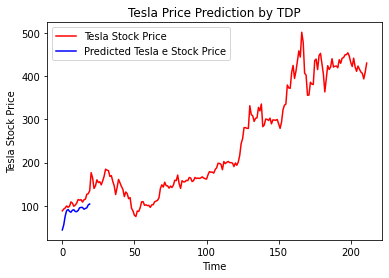

In [76]:
# Visualizing the result
# ---
plt.plot(real_stock_price, color='red', label='Tesla Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Tesla e Stock Price')
plt.title('Tesla Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
# Model Evaluation
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Your observation goes here...

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question? Yes


#### b) Did we have the right data? Yes


#### c) What can be done to improve the solution?

Getting more training data
Increasing the timesteps
Adding some other indicators
Adding more LSTM layers
Adding more neurons in the LSTM layers
